In [1]:
import os
import statistics
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

# CREATE TABLE FITNESS

In [6]:
def get_data_execution(path_base):
    list_best_fitness = []
    list_mean_fitness = []
    
    for i in range(10):
        exec_dir = os.path.join(path_base, f'execution_{i}')
        if os.path.exists(exec_dir):
            fitness_file = os.path.join(exec_dir, 'data_fitness.txt')
            if os.path.exists(fitness_file):
                with open(fitness_file, 'r') as file:
                    linha = file.readline().strip()
                    try:
                        best_fitness, mean_fitness, stdev_fitness = map(float, linha.split())
                        list_best_fitness.append(best_fitness)
                        list_mean_fitness.append(mean_fitness)
                    except ValueError:
                        print(f"Erro ao ler valores no arquivo {fitness_file}. Verifique o formato.")
            else:
                print(f'Arquivo {fitness_file} não encontrado na execução {i}.')
        else:
            print(f'Pasta {exec_dir} não encontrada.')
          
    if list_best_fitness:
        mean_best_fitness = statistics.mean(list_best_fitness)
        stdev_best_fitness = statistics.stdev(list_best_fitness)
    
    if list_mean_fitness:
        mean_all_fitness = statistics.mean(list_mean_fitness)
        stdev_fitness = statistics.stdev(list_mean_fitness)
        
    return mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness

def get_data_stopping_execution(path_base):
    stopping = []
    for i in range(10):
        exec_dir = os.path.join(path_base, f'execution_{i}')
        if os.path.exists(exec_dir):
            file = os.path.join(exec_dir, "stopping_iteration.txt")
            with open(file, 'r') as f:
                stop_iteration = int(f.read().strip())
                stopping.append(stop_iteration)
    return statistics.mean(stopping)
        

In [7]:
if __name__ == '__main__':
    topology = ['focal', 'ring', 'global']
    w_values=[0.1, 0.5, 1.0]
    c1_values=[0.5, 1.0, 2.0]
    c2_values=[0.5, 1.0, 2.0]
    dataset = {'Topologia': [], 'Influência da velocidade (w)': [], 'Influência cognitiva (c1)': [], 'Influência social (c2)': [],
               'Melhor Aptidão - Média': [], 'Melhor Aptidão - Desvio Padrão': [],
               'Aptidão Média - Média': [], 'Aptidão Média - Desvio Padrão': [], 'Número de iterações - Média': []}
    for t in topology:
        for w in w_values:
            for c1 in c1_values:
                for c2 in c2_values:
                        path_base = f'output/{t}_w{w}_c1{c1}_c2{c2}'
                        mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness = get_data_execution(path_base)
                        iteration_mean = get_data_stopping_execution(path_base)
                        dataset['Topologia'].append(t)
                        dataset['Influência da velocidade (w)'].append(w)
                        dataset['Influência cognitiva (c1)'].append(c1)
                        dataset['Influência social (c2)'].append(c2)
                        dataset['Melhor Aptidão - Média'].append(mean_best_fitness)
                        dataset['Melhor Aptidão - Desvio Padrão'].append(stdev_best_fitness)
                        dataset['Aptidão Média - Média'].append(mean_all_fitness)
                        dataset['Aptidão Média - Desvio Padrão'].append(stdev_fitness)
                        dataset['Número de iterações - Média'].append(iteration_mean)

In [8]:
df = pd.DataFrame(dataset)
df.head(10)

,Topologia,Influência da velocidade (w),Influência cognitiva (c1),Influência social (c2),Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão,Número de iterações - Média
0,focal,0.1,0.5,0.5,3.579331e-03,5.623913e-03,3.579331e-03,5.623913e-03,90.2
1,focal,0.1,0.5,1.0,1.206661e-01,1.764816e-01,1.206661e-01,1.764816e-01,94.9
2,focal,0.1,0.5,2.0,1.082088e-02,2.533748e-02,1.082088e-02,2.533748e-02,157.9
3,focal,0.1,1.0,0.5,9.206887e-03,2.100805e-02,9.208266e-03,2.100739e-02,96.0
4,focal,0.1,1.0,1.0,7.500516e-02,1.131083e-01,7.500516e-02,1.131083e-01,94.2
5,focal,0.1,1.0,2.0,1.203491e-03,2.667446e-03,1.203491e-03,2.667446e-03,162.2
6,focal,0.1,2.0,0.5,6.516071e-03,1.769765e-02,3.897620e-02,1.458102e-02,118.3
7,focal,0.1,2.0,1.0,5.167534e-02,7.763025e-02,5.167534e-02,7.763025e-02,96.5
8,focal,0.1,2.0,2.0,4.911627e-14,6.957939e-14,5.463428e-10,1.358347e-09,122.8
9,focal,0.5,0.5,0.5,3.111220e-05,6.899849e-05,3.111220e-05,6.899849e-05,123.2


In [21]:
df_sorted = df.sort_values(by=['Melhor Aptidão - Média', 'Número de iterações - Média'], ascending=[True, True])
df_sorted.head(30)

,Topologia,Influência da velocidade (w),Influência cognitiva (c1),Influência social (c2),Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão,Número de iterações - Média
62,global,0.1,2.0,2.0,1.154632e-15,1.497956e-15,8.538188e-07,2.448990e-06,82.5
63,global,0.5,0.5,0.5,1.154632e-15,1.497956e-15,1.745448e-14,1.997835e-14,99.8
66,global,0.5,1.0,0.5,1.154632e-15,1.497956e-15,5.461231e-12,1.621174e-11,100.5
59,global,0.1,1.0,2.0,1.509903e-15,1.716124e-15,1.715961e-15,1.737871e-15,77.6
64,global,0.5,0.5,1.0,2.575717e-15,1.834613e-15,2.789164e-13,5.211901e-13,102.4
67,global,0.5,1.0,1.0,2.930989e-15,1.716124e-15,4.566907e-13,5.849318e-13,103.6
69,global,0.5,2.0,0.5,3.641532e-15,2.621422e-15,1.189241e-08,2.200933e-08,107.3
12,focal,0.5,1.0,0.5,5.062617e-15,3.763567e-15,4.563330e-11,1.124836e-10,112.7
15,focal,0.5,2.0,0.5,9.325873e-15,6.096238e-15,4.316588e-07,1.349198e-06,116.8
65,global,0.5,0.5,2.0,9.681145e-15,6.084724e-15,3.850893e-11,4.294133e-11,112.4


In [12]:
df_sorted.to_csv(f'output/table_fitness.csv')

# CREATE GRAPHICS

In [13]:
base_directory = f'output/global_w0.1_c12.0_c22.0/'  

In [14]:
def read_data_fitness(directory):
    generations = []
    best_fitness = []
    worst_fitness = []
    mean_fitness = []
    median_fitness = []

    file_path = os.path.join(directory, 'data_generation.txt')

    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            for line in file:
                parts = line.split()
                generation = int(parts[0])  # generation
                best = float(parts[1])  # best fitness
                worst = float(parts[2])  # worst fitness
                mean = float(parts[3])  # mean fitness
                median = float(parts[4])  # median fitness
                generations.append(generation)
                best_fitness.append(best)
                worst_fitness.append(worst)
                mean_fitness.append(mean)
                median_fitness.append(median)
    return generations, best_fitness, worst_fitness, mean_fitness, median_fitness



In [15]:
def plot_fitness_evolution(base_dir, num_executions=10):
    plt.figure(figsize=(10, 6))  
    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best_fitness, _, _, _ = read_data_fitness(execution_dir)
        plt.plot(generations, best_fitness, label=f'Execution {execution_num}')

    plt.title('Evolução do Melhor Fitness por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Melhor Fitness')
    plt.legend()
    plt.show()

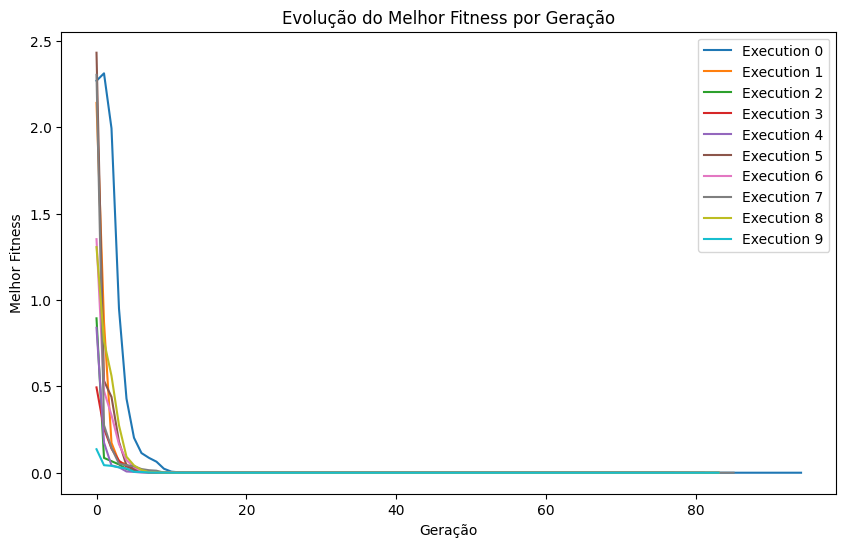

In [16]:
plot_fitness_evolution(base_directory, num_executions=10)

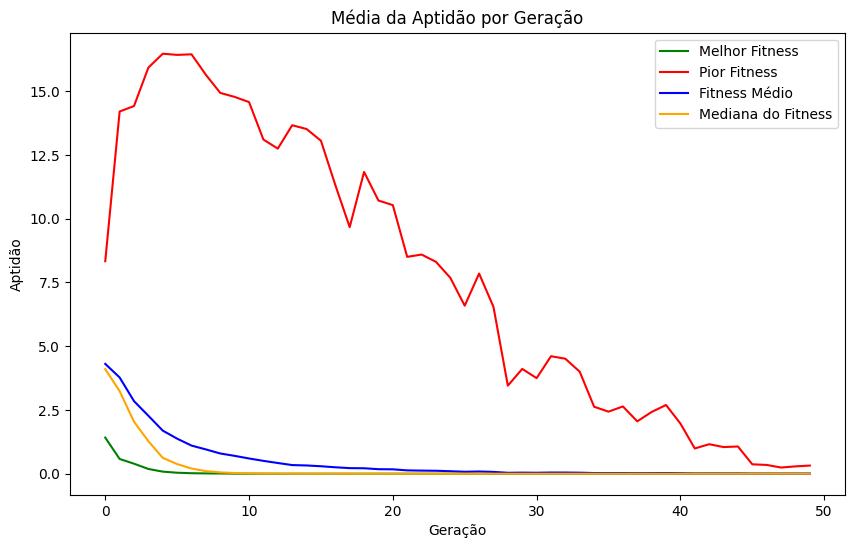

In [19]:
def calculate_values_by_generation(base_dir, num_executions=10, max_generations=None):
    all_best_fitness = []
    all_worst_fitness = []
    all_mean_fitness = []
    all_median_fitness = []

    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best, worst, mean, median = read_data_fitness(execution_dir)

        if max_generations is not None:
            generations = generations[:max_generations]
            best = best[:max_generations]
            worst = worst[:max_generations]
            mean = mean[:max_generations]
            median = median[:max_generations]

        all_best_fitness.append(best)
        all_worst_fitness.append(worst)
        all_mean_fitness.append(mean)
        all_median_fitness.append(median)

    avg_best_fitness = np.mean(all_best_fitness, axis=0)
    avg_worst_fitness = np.mean(all_worst_fitness, axis=0)
    avg_mean_fitness = np.mean(all_mean_fitness, axis=0)
    avg_median_fitness = np.mean(all_median_fitness, axis=0)

    return generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness

def plot_fitness_averages(base_dir, num_executions=10, max_generations=None):
    generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness = calculate_values_by_generation(
        base_dir, num_executions, max_generations
    )

    plt.figure(figsize=(10, 6))  
    plt.plot(generations, avg_best_fitness, label='Melhor Fitness', color='g')
    plt.plot(generations, avg_worst_fitness, label='Pior Fitness', color='r')
    plt.plot(generations, avg_mean_fitness, label='Fitness Médio', color='b')
    plt.plot(generations, avg_median_fitness, label='Mediana do Fitness', color='orange') 
    plt.title('Média da Aptidão por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Aptidão')
    plt.legend()
    plt.show()


plot_fitness_averages(base_directory, num_executions=10, max_generations=50)
